In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_data_spectrum = pickle.load(open('../data/train/spectrum.pkl', 'rb'))
test_data_spectrum = pickle.load(open('../data/test/spectrum.pkl', 'rb'))

# test = pickle.load(open('../data/train/theospec.pkl', 'rb'))

In [2]:
# print(train_data_spectrum.keys())
# print(train_data_spectrum['01088_A05_P010740_S00_N33_R1.mzML'].keys())
# print(train_data_spectrum['01088_A05_P010740_S00_N33_R1.mzML'][47994].keys())
# # print(train_data_spectrum['01088_A05_P010740_S00_N33_R1.mzML'][47994]['mz_arr'])

# # Data layout
# # mzml file: {scan number: {mz_arr: [], intensity_arr: [] }}

# print(test)
# print(test.keys())

In [3]:
# Collect array lengths
# Same for mz and intensity arrs
mz_lens = []
for scan_num in train_data_spectrum['01088_A05_P010740_S00_N33_R1.mzML']:
    mz_lens.append(len(train_data_spectrum['01088_A05_P010740_S00_N33_R1.mzML'][scan_num]['mz_arr']))

In [4]:
# print(mz_lens)

<Axes: ylabel='Count'>

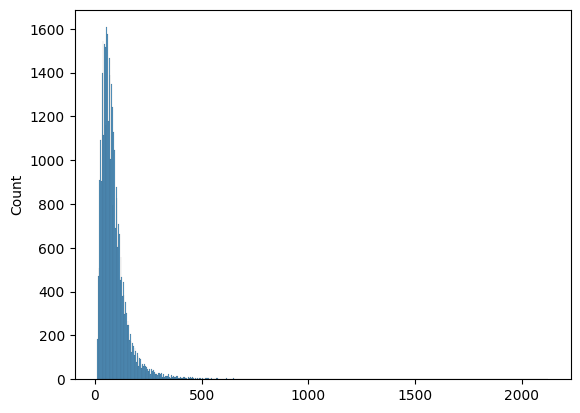

In [5]:
# Distribution of mz_lens
sns.histplot(mz_lens)

In [6]:
# For mz_lens, print num of lens from 100 to 200, 200 to 300, etc
for i in range(0, 3000, 100):
    print('mz_lens from {} to {}: {}'.format(i, i+100, len([x for x in mz_lens if x >= i and x < i+100])))

mz_lens from 0 to 100: 27264
mz_lens from 100 to 200: 9206
mz_lens from 200 to 300: 1373
mz_lens from 300 to 400: 398
mz_lens from 400 to 500: 172
mz_lens from 500 to 600: 92
mz_lens from 600 to 700: 48
mz_lens from 700 to 800: 26
mz_lens from 800 to 900: 9
mz_lens from 900 to 1000: 9
mz_lens from 1000 to 1100: 9
mz_lens from 1100 to 1200: 3
mz_lens from 1200 to 1300: 1
mz_lens from 1300 to 1400: 0
mz_lens from 1400 to 1500: 0
mz_lens from 1500 to 1600: 0
mz_lens from 1600 to 1700: 0
mz_lens from 1700 to 1800: 0
mz_lens from 1800 to 1900: 0
mz_lens from 1900 to 2000: 0
mz_lens from 2000 to 2100: 0
mz_lens from 2100 to 2200: 1
mz_lens from 2200 to 2300: 0
mz_lens from 2300 to 2400: 0
mz_lens from 2400 to 2500: 0
mz_lens from 2500 to 2600: 0
mz_lens from 2600 to 2700: 0
mz_lens from 2700 to 2800: 0
mz_lens from 2800 to 2900: 0
mz_lens from 2900 to 3000: 0


In [7]:
mz_maxes = {
    "train": [],
    "test": []
}
intensity_maxes = {
    "train": [],
    "test": []
}

for df in [[train_data_spectrum, "train"], [test_data_spectrum, "test"]]:
    for mzml_file in df[0]:
        for scan_num in df[0][mzml_file]:
            mz_maxes[df[1]].append(max(df[0][mzml_file][scan_num]['mz_arr']))
            intensity_maxes[df[1]].append(max(df[0][mzml_file][scan_num]['intensity_arr']))

In [8]:
# print(mz_maxes)
# print(intensity_maxes)

<Figure size 640x480 with 0 Axes>

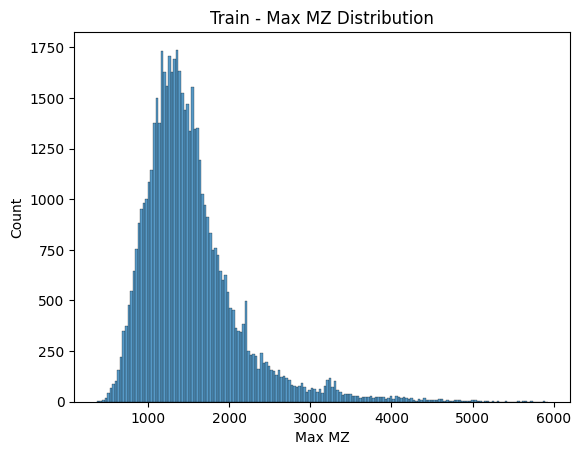

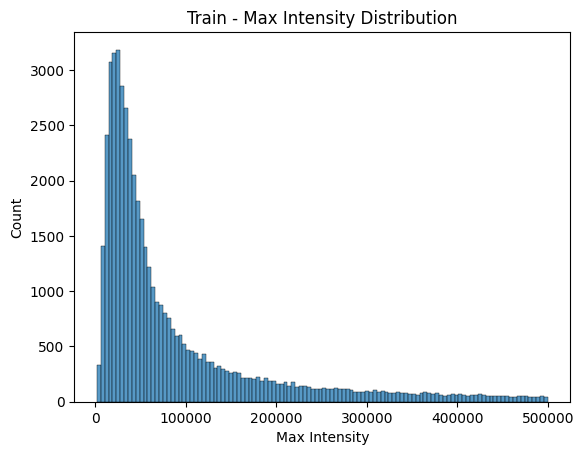

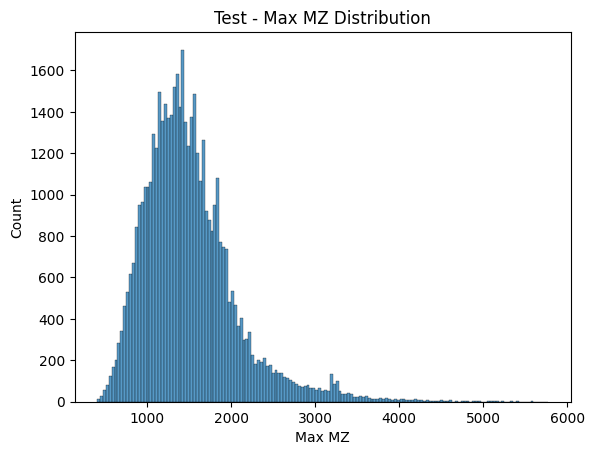

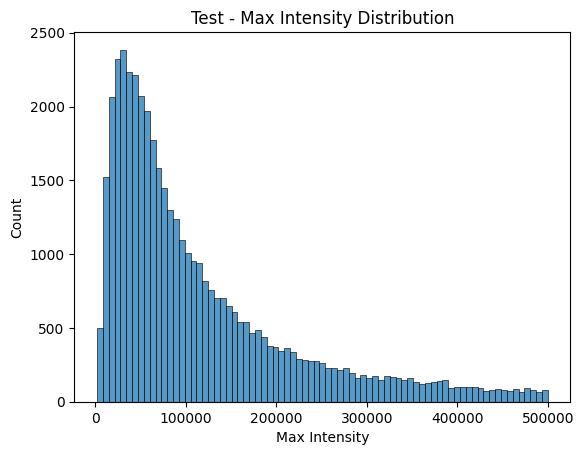

<Figure size 640x480 with 0 Axes>

In [9]:
# Plot mz_maxes distribution
sns.histplot(mz_maxes['train'])
plt.xlabel('Max MZ')
plt.title('Train - Max MZ Distribution')
plt.figure()

# Remove outliers for this one
intensity_maxes_filtered = [x for x in intensity_maxes['train'] if x < 500000]
sns.histplot(intensity_maxes_filtered)
plt.xlabel('Max Intensity')
plt.title('Train - Max Intensity Distribution')
plt.figure()



# Plot mz_maxes distribution
sns.histplot(mz_maxes['test'])
plt.xlabel('Max MZ')
plt.title('Test - Max MZ Distribution')
plt.figure()

# Remove outliers for this one
intensity_maxes_filtered = [x for x in intensity_maxes['test'] if x < 500000]
sns.histplot(intensity_maxes_filtered)
plt.xlabel('Max Intensity')
plt.title('Test - Max Intensity Distribution')
plt.figure()

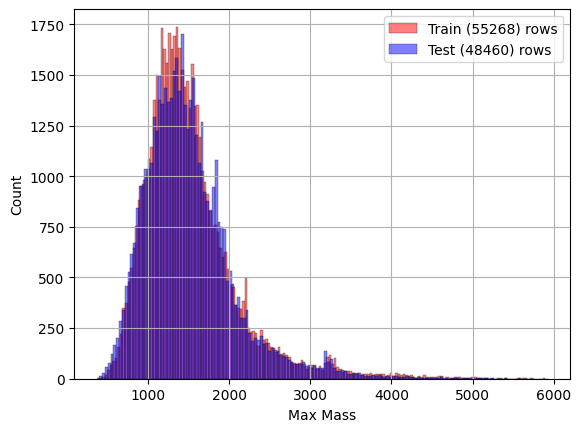

In [30]:
# Overlap train and test max mass distributions plots
sns.histplot(mz_maxes['train'], color='red', alpha=0.5, label='train')
sns.histplot(mz_maxes['test'], color='blue', alpha=0.5, label='test')
plt.xlabel('Max Mass')
# plt.title('Max Mass Distribution')
# Create legend
# plt.legend()
# Show value amounts of datasets in legend
plt.legend(labels=[f'Train ({len(mz_maxes["train"])}) rows', f'Test ({len(mz_maxes["test"])}) rows'])
# Show grid
plt.grid(True)



# See how sparse query spectrum is
# Gap between each m/z?


In [10]:
# For mz_maxes, print count and percent of total where less than 100, less than 200, etc
print("Training")
for i in range(0, 5000, 100):
    print('mz_maxes less than {}: {} ({}%)'.format(i, len([x for x in mz_maxes['train'] if x < i]), round(len([x for x in mz_maxes['train'] if x < i])/len(mz_maxes['train'])*100, 3)))

print("\nTesting")
for i in range(0, 5000, 100):
    print('mz_maxes less than {}: {} ({}%)'.format(i, len([x for x in mz_maxes['test'] if x < i]), round(len([x for x in mz_maxes['test'] if x < i])/len(mz_maxes['test'])*100, 3)))

# For intensity_maxes, print count and percent of total where less than 100, less than 200, etc up until max value
# Too big to print all, just see plot below
# for i in range(0, 500000, 1000):
#     print('intensity_maxes less than {}: {} ({}%)'.format(i, len([x for x in intensity_maxes if x < i]), round(len([x for x in intensity_maxes if x < i])/len(intensity_maxes)*100, 3)))
# print(max(intensity_maxes))


Training
mz_maxes less than 0: 0 (0.0%)
mz_maxes less than 100: 0 (0.0%)
mz_maxes less than 200: 0 (0.0%)
mz_maxes less than 300: 0 (0.0%)
mz_maxes less than 400: 3 (0.005%)
mz_maxes less than 500: 36 (0.065%)
mz_maxes less than 600: 256 (0.463%)
mz_maxes less than 700: 785 (1.42%)
mz_maxes less than 800: 2233 (4.04%)
mz_maxes less than 900: 4519 (8.177%)
mz_maxes less than 1000: 7621 (13.789%)
mz_maxes less than 1100: 11469 (20.752%)
mz_maxes less than 1200: 16445 (29.755%)
mz_maxes less than 1300: 21628 (39.133%)
mz_maxes less than 1400: 26946 (48.755%)
mz_maxes less than 1500: 31764 (57.473%)
mz_maxes less than 1600: 36271 (65.627%)
mz_maxes less than 1700: 40022 (72.414%)
mz_maxes less than 1800: 42796 (77.434%)
mz_maxes less than 1900: 45075 (81.557%)
mz_maxes less than 2000: 47006 (85.051%)
mz_maxes less than 2100: 48380 (87.537%)
mz_maxes less than 2200: 49504 (89.571%)
mz_maxes less than 2300: 50507 (91.386%)
mz_maxes less than 2400: 51206 (92.65%)
mz_maxes less than 2500: 5180

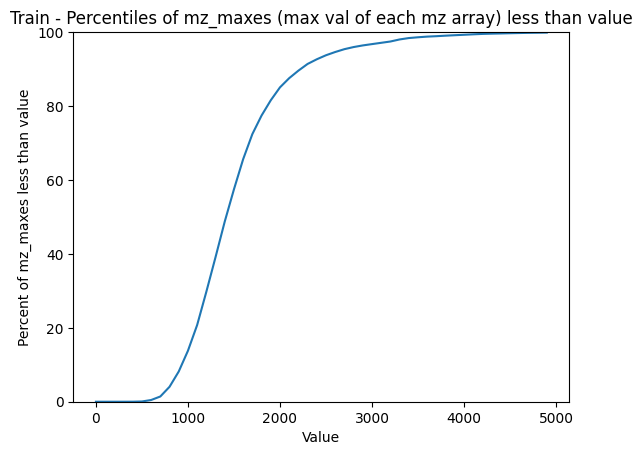

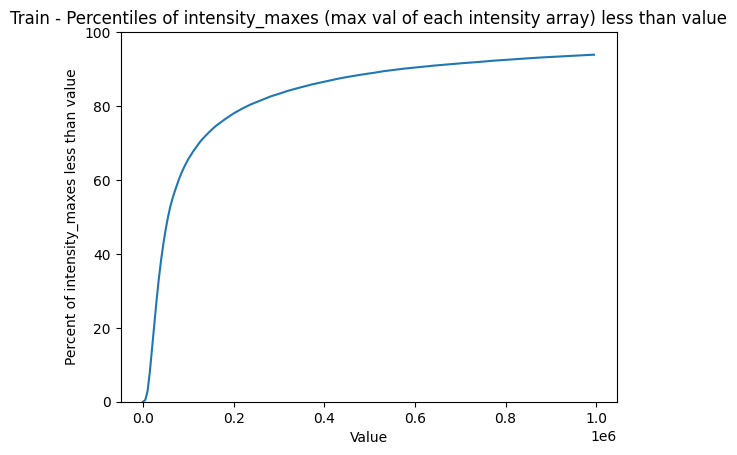

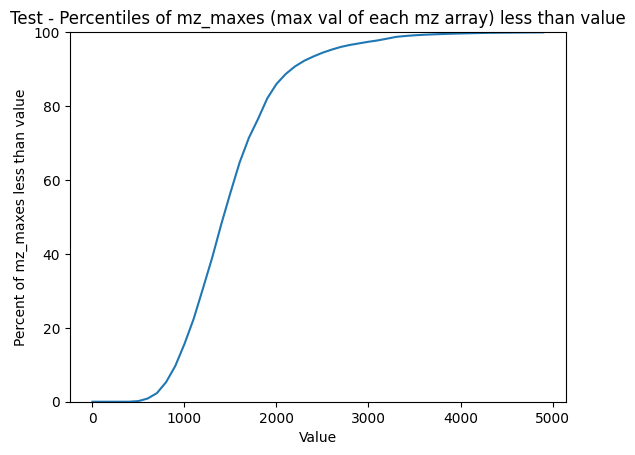

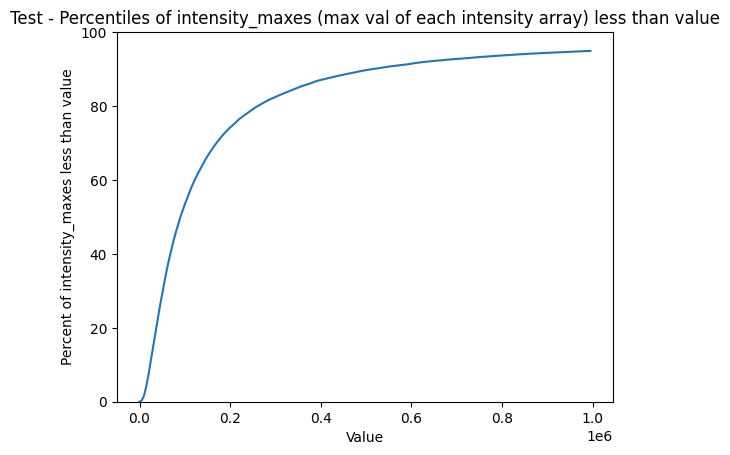

In [11]:
# Train
# line plot representing the percentiles of mz_maxes less than values
x = [x for x in range(0, 5000, 100)]
y = [round(len([x for x in mz_maxes['train'] if x < i])/len(mz_maxes['train'])*100, 3) for i in range(0, 5000, 100)]
plt.plot(x, y)
plt.ylim(0, 100)
plt.ylabel('Percent of mz_maxes less than value')
plt.xlabel('Value')
plt.title('Train - Percentiles of mz_maxes (max val of each mz array) less than value')
plt.show()

# line plot representing the percentiles of intensity_maxes less than values
x = [x for x in range(0, 1000000, 5000)]
y = [round(len([x for x in intensity_maxes['train'] if x < i])/len(intensity_maxes['train'])*100, 3) for i in range(0, 1000000, 5000)]
plt.plot(x, y)
plt.ylim(0, 100)
plt.ylabel('Percent of intensity_maxes less than value')
plt.xlabel('Value')
plt.title('Train - Percentiles of intensity_maxes (max val of each intensity array) less than value')
plt.show()


# Test
# line plot representing the percentiles of mz_maxes less than values
x = [x for x in range(0, 5000, 100)]
y = [round(len([x for x in mz_maxes['test'] if x < i])/len(mz_maxes['test'])*100, 3) for i in range(0, 5000, 100)]
plt.plot(x, y)
plt.ylim(0, 100)
plt.ylabel('Percent of mz_maxes less than value')
plt.xlabel('Value')
plt.title('Test - Percentiles of mz_maxes (max val of each mz array) less than value')
plt.show()

# line plot representing the percentiles of intensity_maxes less than values
x = [x for x in range(0, 1000000, 5000)]
y = [round(len([x for x in intensity_maxes['test'] if x < i])/len(intensity_maxes['test'])*100, 3) for i in range(0, 1000000, 5000)]
plt.plot(x, y)
plt.ylim(0, 100)
plt.ylabel('Percent of intensity_maxes less than value')
plt.xlabel('Value')
plt.title('Test - Percentiles of intensity_maxes (max val of each intensity array) less than value')
plt.show()

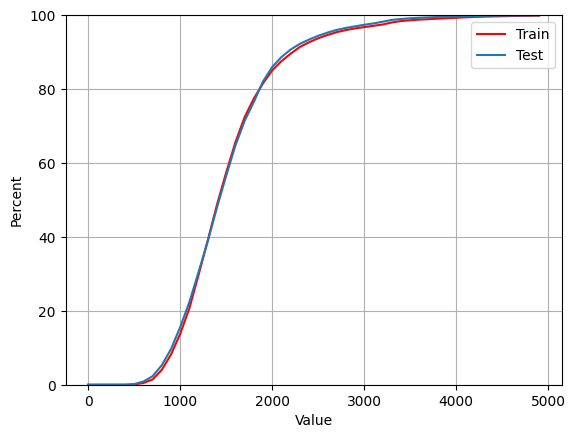

In [31]:
# Overlap train and test for mz maxes of below plots
# Train
# line plot representing the percentiles of mz_maxes less than values
x = [x for x in range(0, 5000, 100)]
y = [round(len([x for x in mz_maxes['train'] if x < i])/len(mz_maxes['train'])*100, 3) for i in range(0, 5000, 100)]
plt.plot(x, y, color='red', label='Train')
plt.ylim(0, 100)
plt.ylabel('Percent of mz_maxes less than value')
plt.xlabel('Value')

# Test
# line plot representing the percentiles of mz_maxes less than values
x = [x for x in range(0, 5000, 100)]
y = [round(len([x for x in mz_maxes['test'] if x < i])/len(mz_maxes['test'])*100, 3) for i in range(0, 5000, 100)]
plt.plot(x, y, label='Test')
plt.ylim(0, 100)
plt.ylabel('Percent')
plt.xlabel('Value')
# plt.title('Percent of rows with max mass less than value')
plt.legend()
plt.grid()
plt.show()


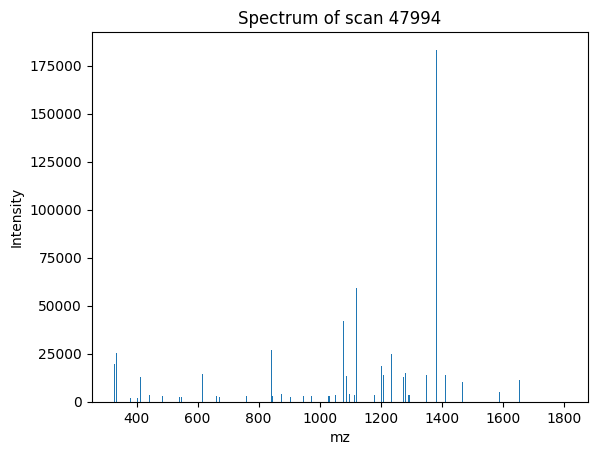

In [13]:
# Plot the spectrum of a scan, bars are intensity, x axis is mz
plt.bar(train_data_spectrum['01088_A05_P010740_S00_N33_R1.mzML'][47994]['mz_arr'], train_data_spectrum['01088_A05_P010740_S00_N33_R1.mzML'][47994]['intensity_arr'])
plt.xlabel('mz')
plt.ylabel('Intensity')
plt.title('Spectrum of scan 47994')
plt.show()


2023-05-31 10:48:03,896:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.
2023-05-31 10:48:03,900:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.
Cosine score is 0.00 with 0 matched peaks


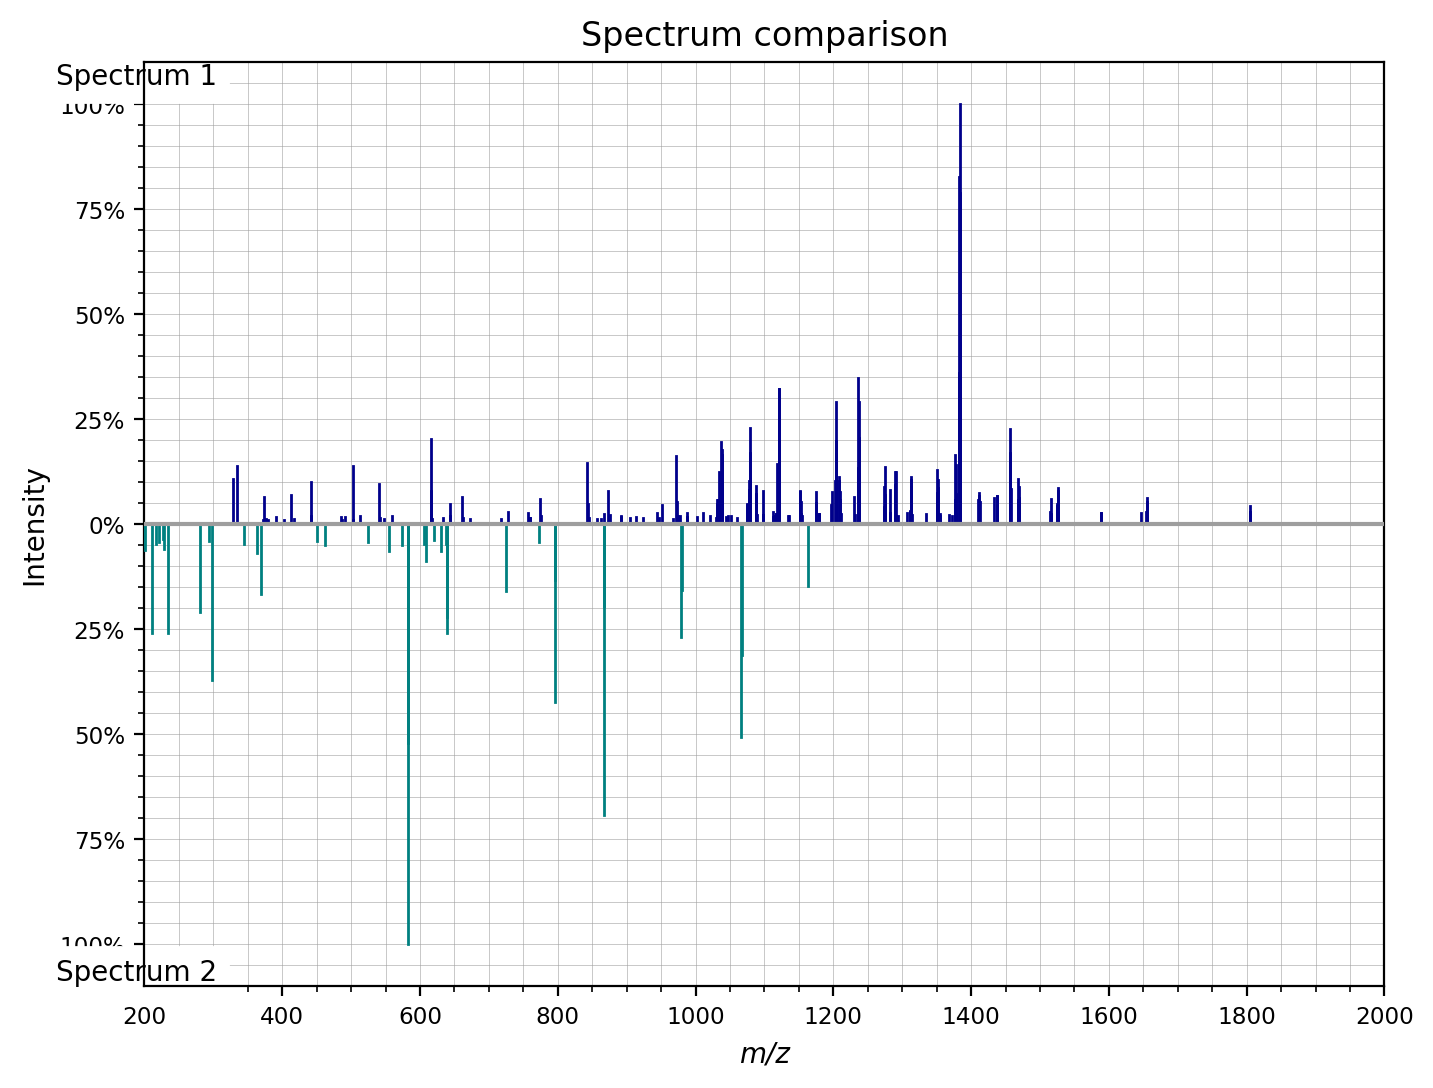

In [14]:

from matchms import Scores, Spectrum
from matchms.similarity import CosineGreedy

# Get mz and intensity arrays for a scan
mz = train_data_spectrum['01088_A05_P010740_S00_N33_R1.mzML'][47994]['mz_arr']
intensity = train_data_spectrum['01088_A05_P010740_S00_N33_R1.mzML'][47994]['intensity_arr']

# Convert mz to array of float
mz = np.array([float(x) for x in mz])
intensity = np.array([float(x) for x in intensity])


spectrum = Spectrum(mz=mz,
                    intensities=intensity,
                    metadata={'id': 'spectrum1',
                              "peak_comments": {mz[0]: "the peak at 0 index m/z"}})

# print(spectrum.peaks.mz[0])
# print(spectrum.peaks.intensities[0])
# print(spectrum.get('id'))
# print(spectrum.peak_comments.get(328.1126708984375))

# spectrum.plot()

# Repeat the above for a 2nd scan
mz2 = train_data_spectrum['01088_A05_P010740_S00_N33_R1.mzML'][47995]['mz_arr']
intensity2 = train_data_spectrum['01088_A05_P010740_S00_N33_R1.mzML'][47995]['intensity_arr']

mz2 = np.array([float(x) for x in mz2])
intensity2 = np.array([float(x) for x in intensity2])

spectrum2 = Spectrum(mz=mz2,
                    intensities=intensity2,
                    metadata={'id': 'spectrum2',
                                "peak_comments": {mz2[0]: "the peak at 0 index m/z"}})

# spectrum2.plot()
spectrum.plot_against(spectrum2)

# Calculate cosine similarity between the 2 spectra
cosine_greedy = CosineGreedy(tolerance=0.2)
score = cosine_greedy.pair(spectrum, spectrum2)
print(f"Cosine score is {score['score']:.2f} with {score['matches']} matched peaks")


In [15]:
from matchms import set_matchms_logger_level
set_matchms_logger_level("ERROR")

# Create spectrums array for all scans in a file
spectrums = []
for scan_num in train_data_spectrum['01088_A05_P010740_S00_N33_R1.mzML']:
    mz = train_data_spectrum['01088_A05_P010740_S00_N33_R1.mzML'][scan_num]['mz_arr']
    intensity = train_data_spectrum['01088_A05_P010740_S00_N33_R1.mzML'][scan_num]['intensity_arr']

    mz = np.array([float(x) for x in mz])
    intensity = np.array([float(x) for x in intensity])

    spectrum = Spectrum(mz=mz,
                        intensities=intensity,
                        metadata={'id': 'spectrum1',
                                  "peak_comments": {mz[0]: "the peak at 0 index m/z"}})
    spectrums.append(spectrum)

# Calculate similarity between all scans in a file
# scores = CosineGreedy(tolerance=0.1, mz_power=0, intensity_power=0)
# score = scores.matrix(spectrums)
# print(score)

# For every spectrum, calculate similarity to every other spectrum
scores = CosineGreedy(tolerance=0.1, mz_power=0, intensity_power=0)
score = scores.matrix(spectrums[0:5], spectrums[0:5])
print(score)


[[(1.        , 230) (0.0567271 ,  15) (0.07511844,  29) (0.12447384,  58)
  (0.04956207,  10)]
 [(0.0567271 ,  15) (1.        , 304) (0.13518452,  60) (0.194138  , 104)
  (0.09915267,  23)]
 [(0.07511844,  29) (0.13518452,  60) (1.        , 648) (0.25187944, 197)
  (0.08562959,  29)]
 [(0.12447384,  58) (0.194138  , 104) (0.25187944, 197) (1.        , 944)
  (0.13210557,  54)]
 [(0.04956207,  10) (0.09915267,  23) (0.08562959,  29) (0.13210557,  54)
  (1.        , 177)]]


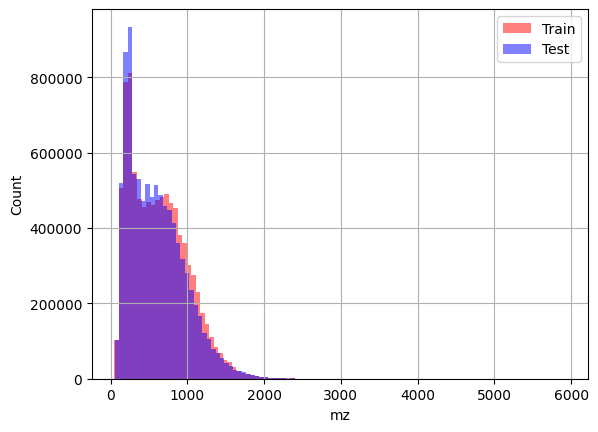

In [47]:
# Make a distribution for all mz values in a file
mz_arr_train = []
for mzml_file in train_data_spectrum:
    for scan_num in train_data_spectrum[mzml_file]:
        mz = train_data_spectrum[mzml_file][scan_num]['mz_arr']
        mz = np.array([float(x) for x in mz])
        mz_arr_train.extend(mz)

# Repeat for test
mz_arr_test = []
for mzml_file in test_data_spectrum:
    for scan_num in test_data_spectrum[mzml_file]:
        mz = test_data_spectrum[mzml_file][scan_num]['mz_arr']
        mz = np.array([float(x) for x in mz])
        mz_arr_test.extend(mz)


# Plot the distributions red and blue
plt.hist(mz_arr_train, bins=100, color='red', alpha=0.5, label='Train')
plt.hist(mz_arr_test, bins=100, color='blue', alpha=0.5, label='Test')
plt.xlabel('mz')
plt.ylabel('Count')
# plt.title('Distribution of mz values')
plt.legend()
plt.grid()
plt.show()

Average sparsity of train data is 0.12
Average sparsity of test data is 0.14


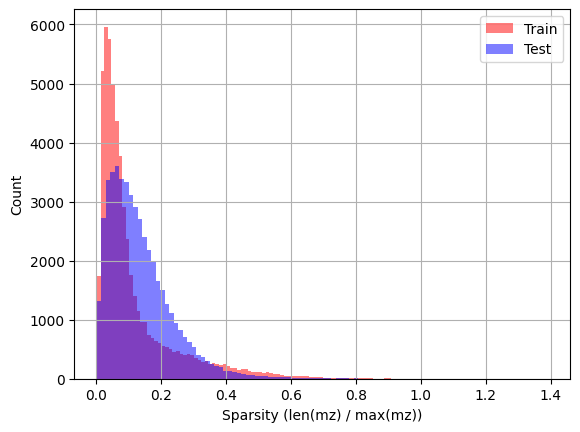

In [46]:
# Calculate sparsity of mz marrays
# For each scan, calculate the number of unique mz values, divide against max mz in that row to get percent
# Then average across all scans
# This is the sparsity of the mz values
sparsity_train = []
for mzml_file in train_data_spectrum:
    for scan_num in train_data_spectrum[mzml_file]:
        mz = train_data_spectrum[mzml_file][scan_num]['mz_arr']
        mz = np.array([float(x) for x in mz])
        sparsity_train.append(len(mz) / max(mz))

sparsity_test = []
for mzml_file in test_data_spectrum:
    for scan_num in test_data_spectrum[mzml_file]:
        mz = test_data_spectrum[mzml_file][scan_num]['mz_arr']
        mz = np.array([float(x) for x in mz])
        sparsity_test.append(len(mz) / max(mz))

print(f"Average sparsity of train data is {np.mean(sparsity_train):.2f}")
print(f"Average sparsity of test data is {np.mean(sparsity_test):.2f}")

# Plot the distributions red and blue
plt.hist(sparsity_train, bins=100, color='red', alpha=0.5, label='Train')
plt.hist(sparsity_test, bins=100, color='blue', alpha=0.5, label='Test')
plt.xlabel('Sparsity (len(mz) / max(mz))')
plt.ylabel('Count')
# plt.title('Distribution of mz values')
plt.legend()
plt.grid()
plt.show()